In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing Data
file_path = r"E:\Users\user\Downloads\archive (2)\housing.csv"
data_df = pd.read_csv(file_path)
data_df.head(50)  # Display first few rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [103]:
data_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [105]:
data_df.shape

(20640, 10)

In [107]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [109]:
data_df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [111]:
missing_values = data_df.isnull().sum()

In [113]:
print("missing value in each column:\n", missing_values)

missing value in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [115]:
missing_percentage = missing_values/len(data_df)*100

In [117]:
print("The percentage of missing data is:\n", missing_percentage)

The percentage of missing data is:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [119]:
# remove rows with missing data
data_df_cleaned = data_df.dropna()

In [121]:
# Verify the removal of missing data
print("\nMissing values in the columns after removal:\n",data_df_cleaned.isnull().sum())


Missing values in the columns after removal:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [124]:
data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Exploratory and Visualization
#### descriptive statistics and visualization

In [127]:
print(data_df_cleaned.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


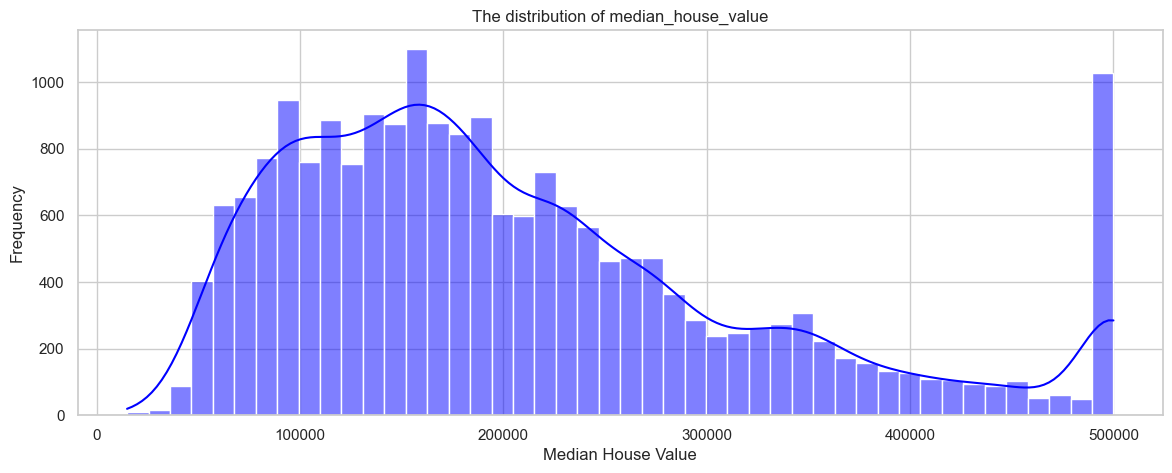

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,5))
sns.histplot(data_df_cleaned["median_house_value"]
            , color='blue', kde=True)
plt.title("The distribution of median_house_value")
plt.xlabel("Median House Value")
plt.ylabel('Frequency')
plt.show()

## using interqualtile Range to Remove Outliers

In [131]:
# Assuming "data_df" is your DataFrame and "median _house_value" is the column of interest
Q1 = data_df_cleaned["median_house_value"].quantile(0.25)
Q3 = data_df_cleaned['median_house_value'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)     
print(IQR)

119500.0
264700.0
145200.0


In [132]:
# Define the boundaries of the outliers
lower_bound = Q1 - (1.5*IQR)
print(lower_bound)
upper_bound = Q3 + (1.5*IQR)
print(upper_bound)
# Remove Outliers
data_no_outliers_1 = data_df_cleaned[(data_df_cleaned["median_house_value"]>=lower_bound) & (data_df_cleaned["median_house_value"]<=upper_bound)]
# check the shape of data before and after removal of outliers
print("Origin data shape:", data_df_cleaned.shape)
print("New data shape without outliers", data_no_outliers_1.shape)

-98300.0
482500.0
Origin data shape: (20433, 10)
New data shape without outliers (19369, 10)


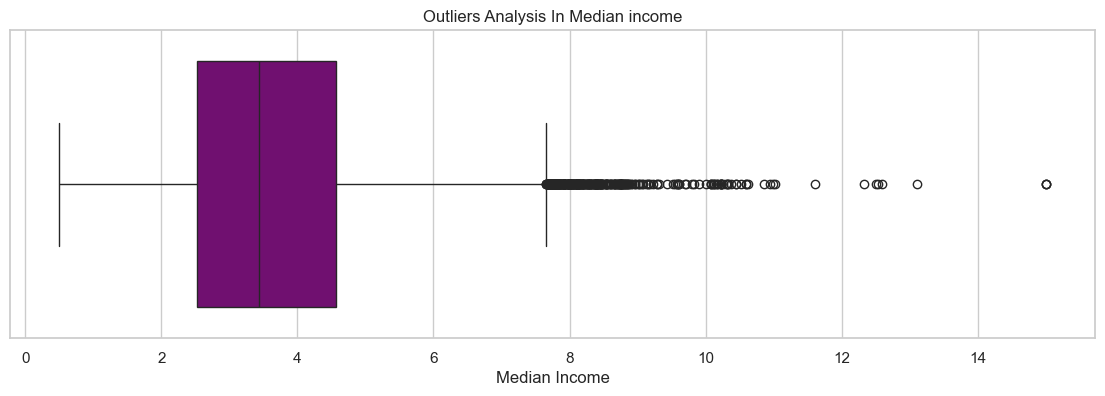

In [136]:
plt.figure(figsize=(14,4))
sns.boxplot(x=data_no_outliers_1["median_income"], color="purple")
plt.title("Outliers Analysis In Median income")
plt.xlabel("Median Income")
plt.show()

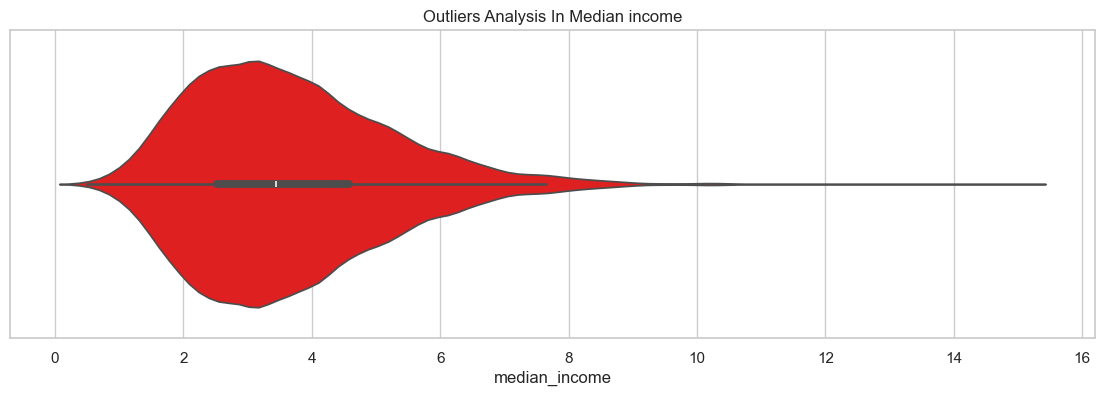

In [137]:
plt.figure(figsize=(14,4))
sns.violinplot(x=data_no_outliers_1["median_income"], color="red")
plt.title("Outliers Analysis In Median income")
plt.show()

In [138]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3-Q1
# Define the boundaries of the outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
# Remove Outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1
["median_income"]>=lower_bound) & (data_no_outliers_1["median_income"]<=upper_bound)
]
# check the shape of data before and after removal of outliers
print("Origin data shape:",data_no_outliers_1.shape) # check the shape of data before and after removal of outliers
print("New data shape without outliers:", data_no_outliers_2.shape)

Origin data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [140]:
data = data_no_outliers_2
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Correlation HeatMap

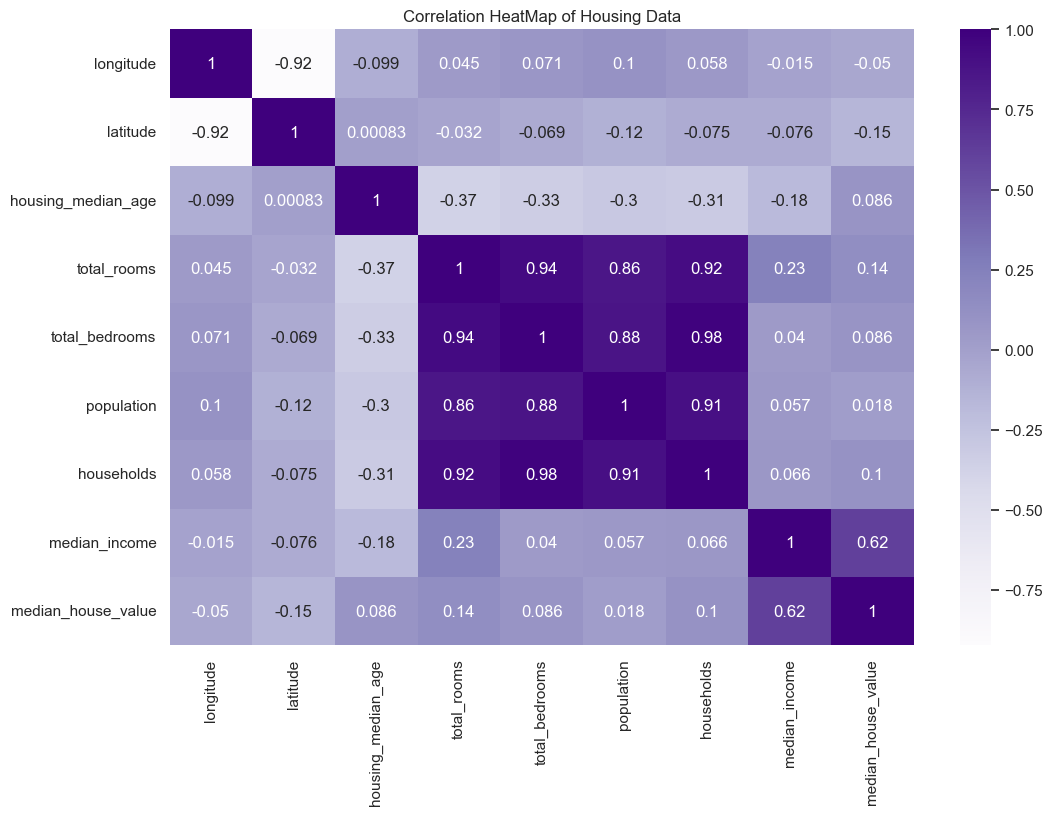

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="Purples")
plt.title("Correlation HeatMap of Housing Data")
plt.show()

In [146]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [149]:
# unique value count for categorical data
for column in ["ocean_proximity"]:
     print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


## String Data Categorization to Dummy Variable

In [152]:
if "ocean_proximity" in data.columns:
    # Generate dummy variables and force conversion to int
    ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix="ocean_proximity", drop_first = True)
    

    # Drop original column and concatenate new dummy variables
    data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1).astype(int)
    print(data.head())  # Verify transformation
else:
    print("There is no 'ocean_proximity' in the columns")

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   
5       -122        37                  52          919             213   
6       -122        37                  52         2535             489   

   population  households  median_income  median_house_value  \
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   
5         413         193              4              269700   
6        1094         514              3              299200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
2                       0                       0                         1   
3     

In [154]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [156]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0
5,-122,37,52,919,213,413,193,4,269700,0,0,1,0
6,-122,37,52,2535,489,1094,514,3,299200,0,0,1,0


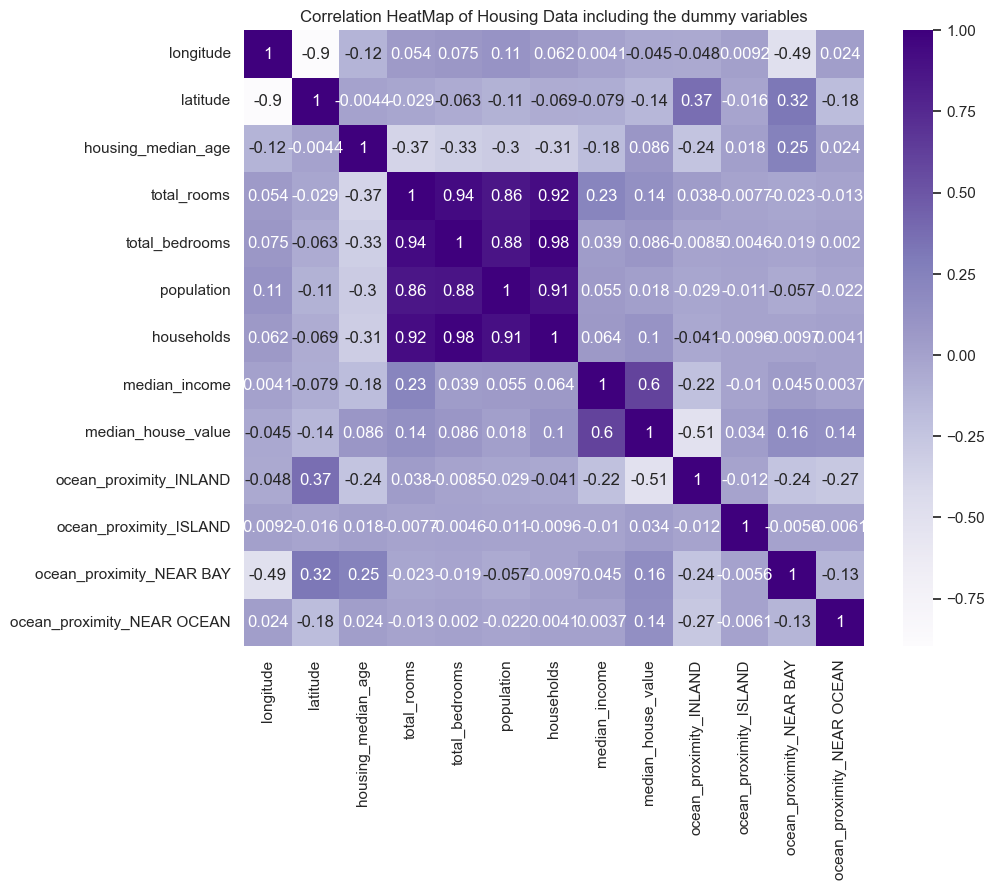

In [158]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="Purples")
plt.title("Correlation HeatMap of Housing Data including the dummy variables")
plt.show()

## Splitting the data

In [160]:
# define the features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
       
target = "median_house_value"
X = data[features]
y = data[target]
# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111)

 #check the size of the splits 
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set Size:{X_test.shape[0]} samples")

Training set size: 15220 samples
Test set Size:3806 samples


## Training

In [164]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116,33,11,3213,634,1975,579,3,0,0,0,0
1656,-121,37,13,2085,292,852,264,7,1,0,0,0
9190,-118,34,52,102,29,54,32,1,0,0,0,0
11839,-120,39,26,2023,385,922,365,2,1,0,0,0
12267,-116,33,13,10886,2127,4266,1955,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,-117,33,7,8206,1523,4399,1423,3,0,0,0,0
9608,-120,37,20,4927,1042,4205,1009,1,1,0,0,0
12606,-121,38,32,2364,439,1331,449,3,1,0,0,0
2907,-119,35,52,1503,367,554,277,1,1,0,0,0


In [166]:
# Adding a constant to the predictors because statmodels' OLS doesn't include by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116,33,11,3213,634,1975,579,3,0,0,0,0
1656,1.0,-121,37,13,2085,292,852,264,7,1,0,0,0
9190,1.0,-118,34,52,102,29,54,32,1,0,0,0,0
11839,1.0,-120,39,26,2023,385,922,365,2,1,0,0,0
12267,1.0,-116,33,13,10886,2127,4266,1955,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117,33,7,8206,1523,4399,1423,3,0,0,0,0
9608,1.0,-120,37,20,4927,1042,4205,1009,1,1,0,0,0
12606,1.0,-121,38,32,2364,439,1331,449,3,1,0,0,0
2907,1.0,-119,35,52,1503,367,554,277,1,1,0,0,0


In [168]:
# fit the Ordinary Linear Squares(OLS) model
model_fitted = sm.OLS(y_train, X_train_const).fit()

In [174]:
# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1645.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:09:26   Log-Likelihood:            -1.8920e+05
No. Observations:               15220   AIC:                         3.784e+05
Df Residuals:                   15207   BIC:                         3.785e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prediction/Testing

In [79]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118,33,27,1871,556,2542,581,2,0,0,0,0
465,1.0,-122,37,52,938,195,393,189,3,0,0,1,0
12768,1.0,-121,38,40,1134,252,675,249,1,1,0,0,0
2617,1.0,-124,40,25,2392,474,1298,461,3,0,0,0,1
13351,1.0,-117,34,9,4265,587,2280,589,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117,33,17,2334,537,1662,535,3,0,0,0,0
1454,1.0,-121,37,28,1838,273,899,270,5,1,0,0,0
7360,1.0,-118,33,28,3507,969,3740,970,2,0,0,0,0
19118,1.0,-122,38,52,1923,393,910,345,3,0,0,0,0


In [ ]:
# Making prediction on the text set
test_prediction = model_fitted.predict(X_test_const)
test_prediction

7322     148720.289222
465      226972.667697
12768     76956.630363
2617     214091.300006
13351    160608.383664
             ...      
11691    186147.795140
1454     208820.236093
7360     156541.502641
19118    232931.579576
13084    204470.603590
Length: 3806, dtype: float64

In [89]:
model_fitted.predict([[1.0,-122,37,52,938,195,393,189,3,0,0,1,0]])[0]

226972.66769690596

# Checking Ordinary Linear Squares(OLS) Assumptions

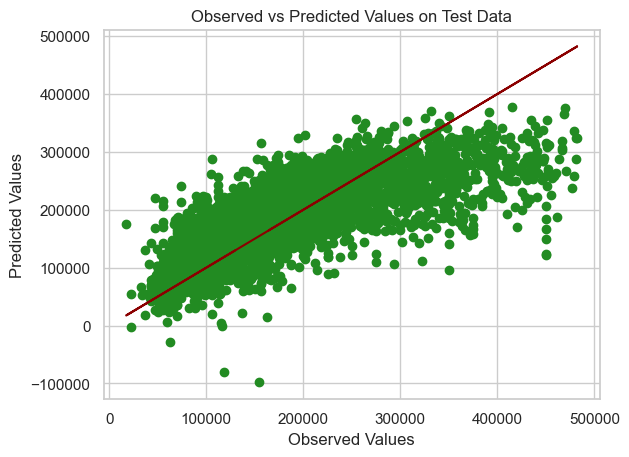

In [176]:
# Scatter Plot for obsreved vs predicted values on test data
plt.scatter(y_test, test_prediction,color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot( y_test, y_test, color="darkred") # line for perfect prediction (true values)
plt.show()

## Assumption 2: random Sample

In [179]:
# calculate the mean of the residuals 
mean_residuals = np.mean(model_fitted.resid)
print(f"The mean of the residues is {np.round(mean_residuals,2)}")

The mean of the residues is -0.0


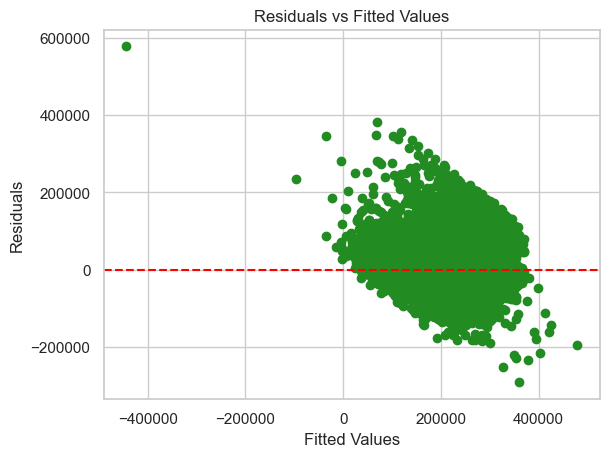

In [181]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


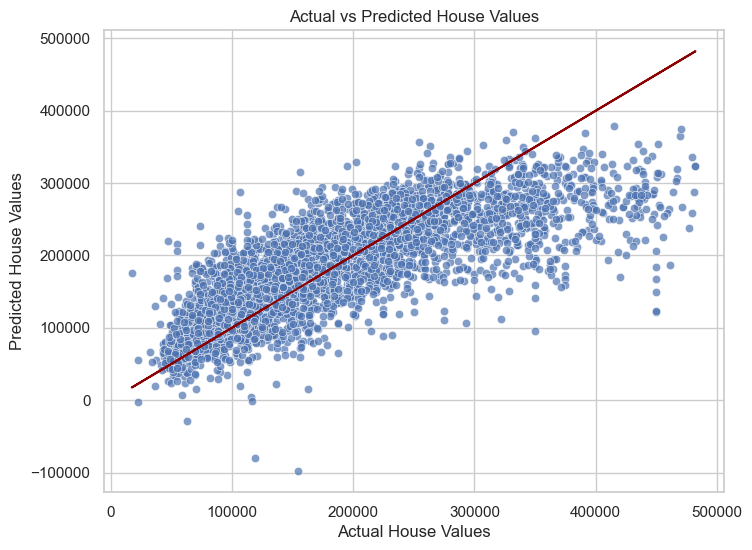

In [190]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Actual vs Predicted House Values")
plt.plot( y_test, y_test, color="darkred") # line for perfect prediction (true values)
plt.show()


# Movie Recommender System

In [ ]:
import pandas as pd

## Exploratory and Data PreProcessing

In [73]:

movies_1 = pd.read_csv(r"C:\Users\user\Downloads\archive (3)\tmdb_5000_movies.csv")
movies_2 = pd.read_csv(r"C:\Users\user\Downloads\tmdb-movies.csv")

In [7]:
movies_1.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
movies_2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
movies_2.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
movies_2["tags"] = movies_2['overview'] + movies_2["genres"]

In [15]:
movies_2

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,tags
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Twenty-two years after the events of Jurassic ...
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,An apocalyptic story set in the furthest reach...
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Beatrice Prior must confront her inner demons ...
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Thirty years after defeating the Galactic Empi...
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Grand Prix driver Pete Aron is fired by his te...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,An insurance agent who moonlights as a carthie...
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,"In comic Woody Allen's film debut, he took the..."


In [17]:
new_data = movies_2.drop(columns=["overview", "genres"])

In [19]:

new_data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,tags
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Twenty-two years after the events of Jurassic ...
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,An apocalyptic story set in the furthest reach...
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Beatrice Prior must confront her inner demons ...
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Thirty years after defeating the Galactic Empi...
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,95,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,176,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Grand Prix driver Pete Aron is fired by his te...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,94,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,An insurance agent who moonlights as a carthie...
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,80,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,"In comic Woody Allen's film debut, he took the..."


## Text Cleaning (NLPText Cleaning steps with NLTK)

In [22]:
import nltk #A popular NLP library in Python.
import re #A module for working with regular expressions.
from nltk.corpus import stopwords #A list of common words (like "the", "is") that do not add much meaning to text.
from nltk.corpus import wordnet # A lexical database for English
from nltk.stem import WordNetLemmatizer # A tool for reducing words to their root form.
from nltk.tokenize import word_tokenize # A function to split text into words



## Download necessary NLTK resources
nltk.download ("punkt_tab")
nltk.download("wordnet")
nltk.download("stopwords")
def clean_text(text):
    # check if text is not a string
    if not isinstance(text,str):
        return"" # or some other default value like "NAN" or None
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation but keep digits
    text = re.sub(r'[^\w\s]', '', text)

    #Tokenize
    words = word_tokenize(text)

    #Remove stop words
    stop_words = set(stopwords.words(None))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # join the words back together
    text = ' '.join(words)
    return text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(new_data.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'runtime',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'tags'],
      dtype='object')


### Count Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [29]:
new_data["tags_clean"]= new_data["tags"].apply(clean_text)

train_data, test_data = train_test_split(new_data, test_size=0.2, random_state = 42)

cv = CountVectorizer(max_features=10000, stop_words="english")

vector = cv.fit_transform(new_data["tags_clean"].values.astype("U")).toarray()

new_data["tags"]

0        Twenty-two years after the events of Jurassic ...
1        An apocalyptic story set in the furthest reach...
2        Beatrice Prior must confront her inner demons ...
3        Thirty years after defeating the Galactic Empi...
4        Deckard Shaw seeks revenge against Dominic Tor...
                               ...                        
10861    The Endless Summer, by Bruce Brown, is one of ...
10862    Grand Prix driver Pete Aron is fired by his te...
10863    An insurance agent who moonlights as a carthie...
10864    In comic Woody Allen's film debut, he took the...
10865    A family gets lost on the road and stumbles up...
Name: tags, Length: 10866, dtype: object

In [114]:
vector.shape

(10866, 10000)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06692745, 0.06622662, ..., 0.        , 0.        ,
        0.        ],
       [0.06692745, 1.        , 0.0421076 , ..., 0.        , 0.0893237 ,
        0.        ],
       [0.06622662, 0.0421076 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.0893237 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [39]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  runtime               10866 non-null  int64  
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

In [40]:
# Assuming similarity and new_data are already defined from previous cells
# Example: similarity is computed from CountVectorizer and cosine_similarity

def recommend(movie_title, similarity_matrix, data, top_n=5):
    # Find the index of the movie
    try:
        movie_idx = data[data['original_title'].str.lower() == movie_title.lower()].index[0]
    except IndexError:
        return f"Movie '{movie_title}' not found in the dataset."
    
    # Get similarity scores for the movie
    distance = sorted(list(enumerate(similarity_matrix[movie_idx])), reverse=True, key=lambda vector: vector[1])
    
    # Get the top N similar movies (excluding the movie itself)
    recommendations = distance[1:top_n+1]  # Skip the first item (self-match)
    
    # Print recommendations
    print(f"Recommendations for: {movie_title}")
    for i, (idx, score) in enumerate(recommendations, 1):
        print(f"{i}. {data.iloc[idx].original_title} (Similarity: {score:.4f})")

# Example usage
recommend("Furious 7", similarity, new_data)

Recommendations for: Furious 7
1. Martyrs (Similarity: 0.2857)
2. The Shooting (Similarity: 0.2857)
3. The Lovely Bones (Similarity: 0.2673)
4. Urban Justice (Similarity: 0.2673)
5. Porky's (Similarity: 0.2535)


In [41]:
import pickle

#save the similarity matrix
with open('similarity.pkl', 'wb') as f:
    pickle.dump(similarity, f)

#save the dataset
with open("movies_list.pkl", 'wb') as f:
    pickle.dump(new_data, f)

In [42]:
import streamlit as st
import requests

In [43]:
# function to fetch movie poster using movie_id
def fetch_poster(id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=7c19f6d3f277946f1d0d64c8baccbb81b1a8language=en-US"
    data=requests.get(url)
    data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path
movies = pickle.load(open("movies_list.pkl", "rb")) 
similarity  = pickle.load(open("similarity.pkl", "rb"))
movies_2_list = movies["original_title"].values

st.header("Movie Recommender system")

import streamlit.components.v1 as components

imageCarouselComponent = components.declare_component("image-carousel-component", path="frontend/build")
imageUrls = [
  fetch_poster(1622),
  fetch_poster(293556),
  fetch_poster(17455),
  fetch_poster(2830),
  fetch_poster(425423),
  fetch_poster(9722),
  fetch_poster(13972),
  fetch_poster(240),
  fetch_poster(155),
  fetch_poster(590),
  fetch_poster(934),
  fetch_poster(255709),
  fetch_poster(572154),
     
 ]
imageCarouselComponent(imageUrls=imageUrls, height=200)

selectvalue = st.selectbox("Select movie from dropdown", movies_2_list)

def recommend(movie):
    
    index = movies_2[movies_2["original_title"]== movie].index[0]

    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])
    recommend_movie=[]
    recommend_poster=[]
    for i in distance [1:5]:
        movies_id = movies_2.iloc[i[0]["id"]]
        recommend_movie.append(movies.iloc[i[0]]['original_title'])
        recommend_poster.append(fetch_poster(movies_id))

    return recommend_movie, recommend_poster
if st.button("Recommend"):
    recommend_movie, recommend_poster = recommend(selectvalue)
    col1, col2, col3, col4, col5 = st.columns(5)
    
    with col1:
        st.text(recommend_movie[0])
        st.image(recommend_poster[0], width=100)

    with col2:
        st.text(recommend_movie[1])
        st.image(recommend_poster[1], width=100)


    with col3:
        st.text(recommend_movie[2])
        st.image(recommend_poster[2], width=100)
       
    with col4:
        st.text(recommend_movie[3])
        st.image(recommend_poster[3], width=100)
       
    with col5:
        st.text(recommend_movie[4])
        st.image(recommend_poster[4], width=100)


       
       


2025-04-12 21:28:28.901 
  command:

    streamlit run E:\Users\user\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


AssertionError: 